In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import QuantileTransformer
from sklearn.pipeline import make_pipeline

from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence
from sklearn.experimental import enable_hist_gradient_boosting  
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import fetch_california_housing

## MLLytics Packages

In [2]:
from MLLytics.interpretation import make_pdp, plot_pdp

In [4]:
## R2 score
## RSME 
## Kaggle regression example

In [5]:
from sklearn.linear_model import LinearRegression

## Some model

In [7]:
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1,random_state=0)

lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)


0.609803397808786

In [15]:
X_train.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2255,3.1250,16.0,5.380071,1.058201,3407.0,3.004409,36.80,-119.83
17341,2.0508,11.0,4.993884,1.064220,504.0,1.541284,34.86,-120.40
11589,5.1061,26.0,6.714765,1.013423,836.0,2.805369,33.78,-118.03
13635,2.3750,38.0,4.307065,0.937500,1347.0,3.660326,34.09,-117.32
693,2.1552,23.0,3.812641,1.040632,828.0,1.869074,37.70,-122.11


In [16]:
cols = X_train.columns.to_list()

In [17]:
coeffs = lr.coef_

In [23]:
coeffs

array([ 4.34709620e-01,  9.41471781e-03, -1.03371675e-01,  6.22951006e-01,
       -5.44301549e-06, -5.29435862e-03, -4.19573263e-01, -4.32535175e-01])

In [20]:
np.arange(len(coeffs))

array([0, 1, 2, 3, 4, 5, 6, 7])

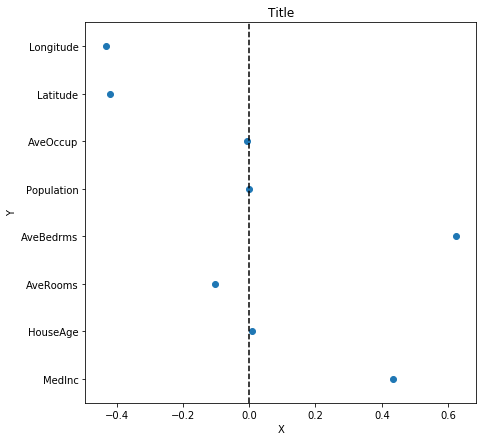

In [63]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7))
axs.scatter(coeffs, np.arange(len(coeffs))+1)
axs.set_ylim(0.5,8.5)
axs.set_yticklabels(['']+cols)
axs.axvline(0.0, 0, 1, linestyle='--', color='k')

axs.set_ylabel('Y')
axs.set_xlabel('X')
axs.set_title('Title')

plt.show()

In [72]:
coeffs

array([ 4.34709620e-01,  9.41471781e-03, -1.03371675e-01,  6.22951006e-01,
       -5.44301549e-06, -5.29435862e-03, -4.19573263e-01, -4.32535175e-01])

In [74]:
cols

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [75]:
X_coeffs = X_train.copy()

X_coeffs.MedInc *= coeffs[0]
X_coeffs.HouseAge *= coeffs[1]
X_coeffs.AveRooms *= coeffs[2]
X_coeffs.AveBedrms *= coeffs[3]
X_coeffs.Population *= coeffs[4]
X_coeffs.AveOccup *= coeffs[5]
X_coeffs.Latitude *= coeffs[6]
X_coeffs.Longitude *= coeffs[7]

X_coeffs.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
2255,1.358468,0.150635,-0.556147,0.659207,-0.018544,-0.015906,-15.440296,51.830690
17341,0.891502,0.103562,-0.516226,0.662957,-0.002743,-0.008160,-14.626324,52.077235
11589,2.219671,0.244783,-0.694117,0.631313,-0.004550,-0.014853,-14.173185,51.052127
13635,1.032435,0.357759,-0.445229,0.584017,-0.007332,-0.019379,-14.303253,50.745027
693,0.936886,0.216539,-0.394119,0.648263,-0.004507,-0.009896,-15.817912,52.816870


In [89]:
import matplotlib.cbook as cbook

stats = cbook.boxplot_stats(X_coeffs.values, labels=X_coeffs.columns.to_list())#, bootstrap=10000)

In [106]:
X1 = X_coeffs.iloc[0].values
X1

array([ 1.35846756e+00,  1.50635485e-01, -5.56146902e-01,  6.59207414e-01,
       -1.85443538e-02, -1.59064196e-02, -1.54402961e+01,  5.18306900e+01])

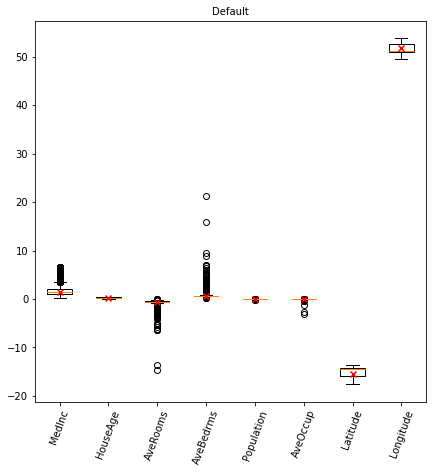

In [114]:
fs=10
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), sharey=True)
axs.bxp(stats)
axs.set_title('Default', fontsize=fs)



plt.xticks(rotation=70)

#axs.set_yscale('log')
#axs.set_xticklabels(['A', 'B', 'C', 'Bla'])

plt.scatter(1, X1[0], color='red', marker='x', zorder=100)
plt.scatter(2, X1[1], color='red', marker='x', zorder=100)
plt.scatter(3, X1[2], color='red', marker='x', zorder=100)
plt.scatter(4, X1[3], color='red', marker='x', zorder=100)
plt.scatter(5, X1[4], color='red', marker='x', zorder=100)
plt.scatter(6, X1[5], color='red', marker='x', zorder=100)
plt.scatter(7, X1[6], color='red', marker='x', zorder=100)
plt.scatter(8, X1[7], color='red', marker='x', zorder=100)

In [116]:
y_test

array([1.369, 2.413, 2.007, ..., 2.379, 2.451, 1.635])

In [119]:
y_pred = lr.predict(X_test)
y_pred

array([2.27471227, 2.78176818, 1.89960405, ..., 2.63191013, 2.44479523,
       1.3824136 ])

Text(0, 0.5, 'Y')

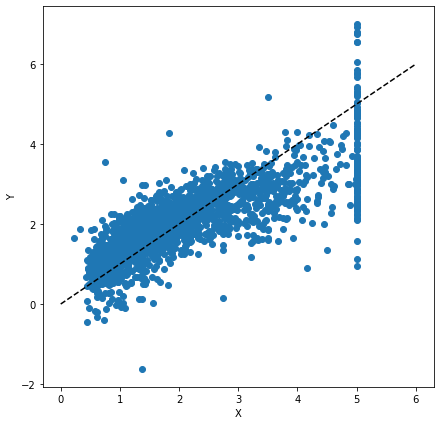

In [127]:
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_pred)
plt.plot([0,6], [0,6], color='k', linestyle='--')
plt.xlabel('X')
plt.ylabel('Y')

In [132]:
X_train.quantile(0.01)

MedInc          1.064875
HouseAge        4.000000
AveRooms        2.581251
AveBedrms       0.870278
Population     88.000000
AveOccup        1.537734
Latitude       32.680000
Longitude    -123.210000
Name: 0.01, dtype: float64

In [130]:
X_train.MedInc

2255     3.1250
17341    2.0508
11589    5.1061
13635    2.3750
693      2.1552
          ...  
13123    4.4125
19648    2.9135
9845     3.1977
10799    5.6315
2732     1.3882
Name: MedInc, Length: 18576, dtype: float64

In [129]:
X_train[X_train.MedInc <= 1.903800]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
1780,1.5139,38.0,3.727273,0.867133,729.0,2.548951,37.95,-122.36
19545,1.7054,39.0,3.900826,1.003306,2047.0,3.383471,37.63,-120.97
4623,0.8804,36.0,2.713235,1.080882,145.0,1.066176,34.06,-118.31
16276,1.4583,33.0,3.586735,0.903061,2248.0,3.823129,37.93,-121.26
4487,1.6667,46.0,3.445902,0.990164,1435.0,4.704918,34.05,-118.19
...,...,...,...,...,...,...,...,...
14312,1.6023,32.0,3.878788,1.069697,1335.0,4.045455,32.70,-117.14
14324,1.2292,52.0,2.340136,1.204082,460.0,3.129252,32.72,-117.15
12676,1.3571,21.0,2.814714,1.019074,2548.0,3.471390,38.56,-121.42
2897,1.1944,44.0,5.046512,1.279070,274.0,3.186047,35.38,-119.01
